## DICTIONARY

<b>ID:</b> ID Number of Customers. <br><br>
<b>Warehouse block:</b> The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
<br><br>
<b>Mode of shipment:</b> The Company Ships the products in multiple way such as Ship, Flight and Road.<br><br>
<b>Customer care calls:</b> The number of calls made from enquiry for enquiry of the shipment.<br><br>
<b>Customer rating:</b> The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).<br><br>
<b>Cost of the product:</b> Cost of the Product in US Dollars.<br><br>
<b>Prior purchases:</b> The Number of Prior Purchase.<br><br>
<b>Product importance:</b> The company has categorized the product in the various parameter such as low, medium, high.<br><br>
<b>Gender:</b> Male and Female.<br><br>
<b>Discount offered:</b> Discount offered on that specific product.<br><br>
<b>Weight in gms:</b> It is the weight in grams.<br><br>
<b>Reached on time:</b> It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.<br><br>

# Imports

In [40]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import inflection

## 0.1 - Loading data

In [9]:
df = pd.read_csv("../data/data.csv")

In [11]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# 1.0 - DATA DESCRIPTION

## 1.0.1 - Renaming columns

In [65]:
df1 = df.copy()

In [66]:
df1.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [67]:
columns_old = df.columns

In [68]:
#Converting the columns names to snake_case 
rename_columns = lambda x: inflection.underscore(x)
columns_new = list(map(rename_columns, columns_old))

#Renaming
df1.columns = columns_new

## 1.0.2 - Data Dimension

In [69]:
print( 'The dataframe has {} lines and {} columns'.format(df1.shape[0], df1.shape[1]) )

The dataframe has 10999 lines and 12 columns


## 1.0.3 - Data Types

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10999 non-null  int64 
 1   warehouse_block      10999 non-null  object
 2   mode_of_shipment     10999 non-null  object
 3   customer_care_calls  10999 non-null  int64 
 4   customer_rating      10999 non-null  int64 
 5   cost_of_the_product  10999 non-null  int64 
 6   prior_purchases      10999 non-null  int64 
 7   product_importance   10999 non-null  object
 8   gender               10999 non-null  object
 9   discount_offered     10999 non-null  int64 
 10  weight_in_gms        10999 non-null  int64 
 11  reached.on.time_y.n  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [71]:
# Converting Dtypes 
df1['cost_of_the_product'] = df1['cost_of_the_product'].astype(float)

# And checking again
df1.dtypes

id                       int64
warehouse_block         object
mode_of_shipment        object
customer_care_calls      int64
customer_rating          int64
cost_of_the_product    float64
prior_purchases          int64
product_importance      object
gender                  object
discount_offered         int64
weight_in_gms            int64
reached.on.time_y.n      int64
dtype: object

## 1.0.4 - Checking N/A

In [23]:
df1.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

# 1.1 - DESCRIPTIVE STATISTICS

## 1.1.1 - Numerical and categorical attributes

In [27]:
numerical_list = ['int64', 'float64', 'int32']

#Separating numerical and categorical att
numerical_attributes = df1.select_dtypes(include = numerical_list)
categorical_attributes = df1.select_dtypes(exclude = numerical_list)

## 1.1.2 Central tendency and dispersion metrics

In [29]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
cost_of_the_product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
reached.on.time_y.n,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


## 1.1.3 Categorical attributes 

In [72]:
categorical_attributes.columns

Index(['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender'], dtype='object')

In [98]:
#warehouse_block
warehouse_block = categorical_attributes['warehouse_block'].value_counts(normalize = True).reset_index()
warehouse_block.columns = ['warehouse_block', 'values']

#mode_of_shipment
shipment = categorical_attributes['mode_of_shipment'].value_counts(normalize = True).reset_index()
shipment.columns = ['shipment', 'values']

#product_importance
product_importance = categorical_attributes['product_importance'].value_counts(normalize = True).reset_index()
product_importance.columns = ['product_importance', 'values']

#gender
gender = categorical_attributes['gender'].value_counts(normalize = True).reset_index()
gender.columns = ['gender', 'values']


<AxesSubplot:xlabel='gender', ylabel='values'>

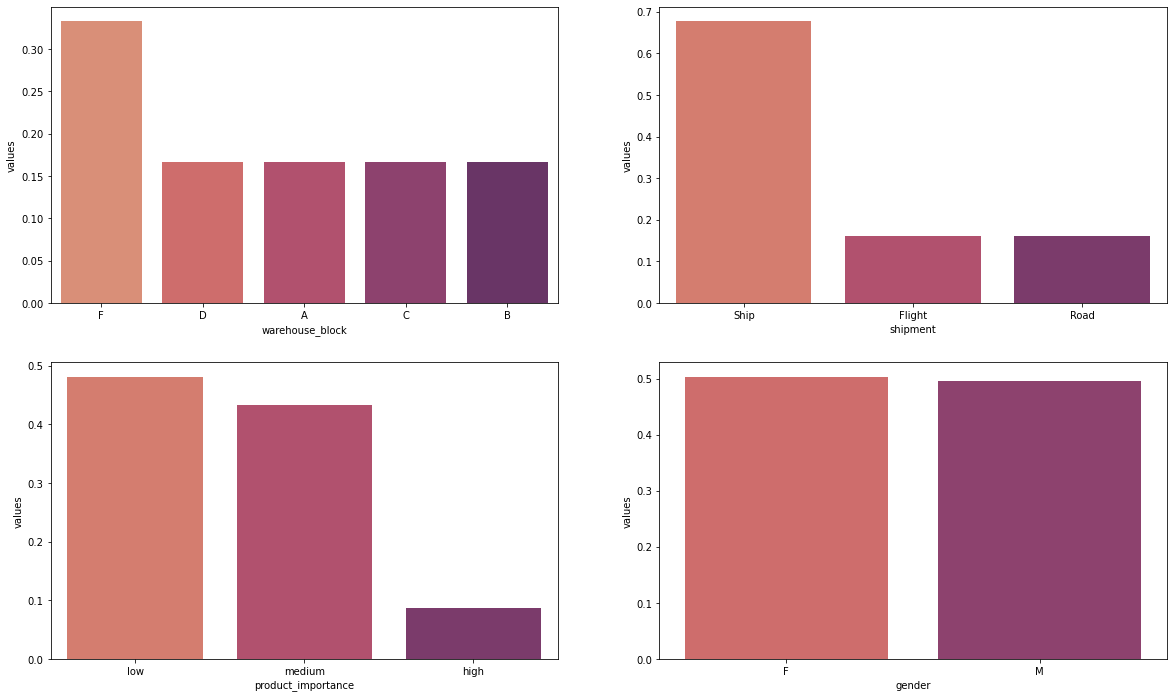

In [99]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.barplot(x = 'warehouse_block', y = 'values', data = warehouse_block, palette = 'flare')


plt.subplot(2,2,2)
sns.barplot(x = 'shipment', y = 'values', data = shipment, palette = 'flare')

plt.subplot(2,2,3)
sns.barplot(x = 'product_importance', y = 'values', data = product_importance, palette = 'flare')


plt.subplot(2,2,4)
sns.barplot(x = 'gender', y = 'values', data = gender, palette = 'flare')